<a href="https://colab.research.google.com/github/muhammadkayed/GazaSkyGeeksRepo/blob/main/FishWeightPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset (example for illustration; replace with your actual data)
fishs=pd.read_csv('/content/Fish.csv')
fishs.head(20)




,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
5,1,Bream,450.0,13.6024,4.9274,26.8,29.7,34.7
6,1,Bream,500.0,14.1795,5.2785,26.8,29.7,34.5
7,1,Bream,390.0,12.6700,4.6900,27.6,30.0,35.0
8,1,Bream,450.0,14.0049,4.8438,27.6,30.0,35.1
9,1,Bream,500.0,14.2266,4.9594,28.5,30.7,36.2


In [7]:
fishs.tail()


,Category,Species,Weight,Height,Width,Length1,Length2,Length3
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2
158,6,Smelt,19.9,2.9322,1.8792,13.8,15.0,16.2


In [8]:
fishs.shape

(159, 8)

In [13]:
fishs.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [16]:
fishs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [18]:
fishs.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [21]:
Species=fishs["Species"].unique
print(Species)

<bound method Series.unique of 0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object>


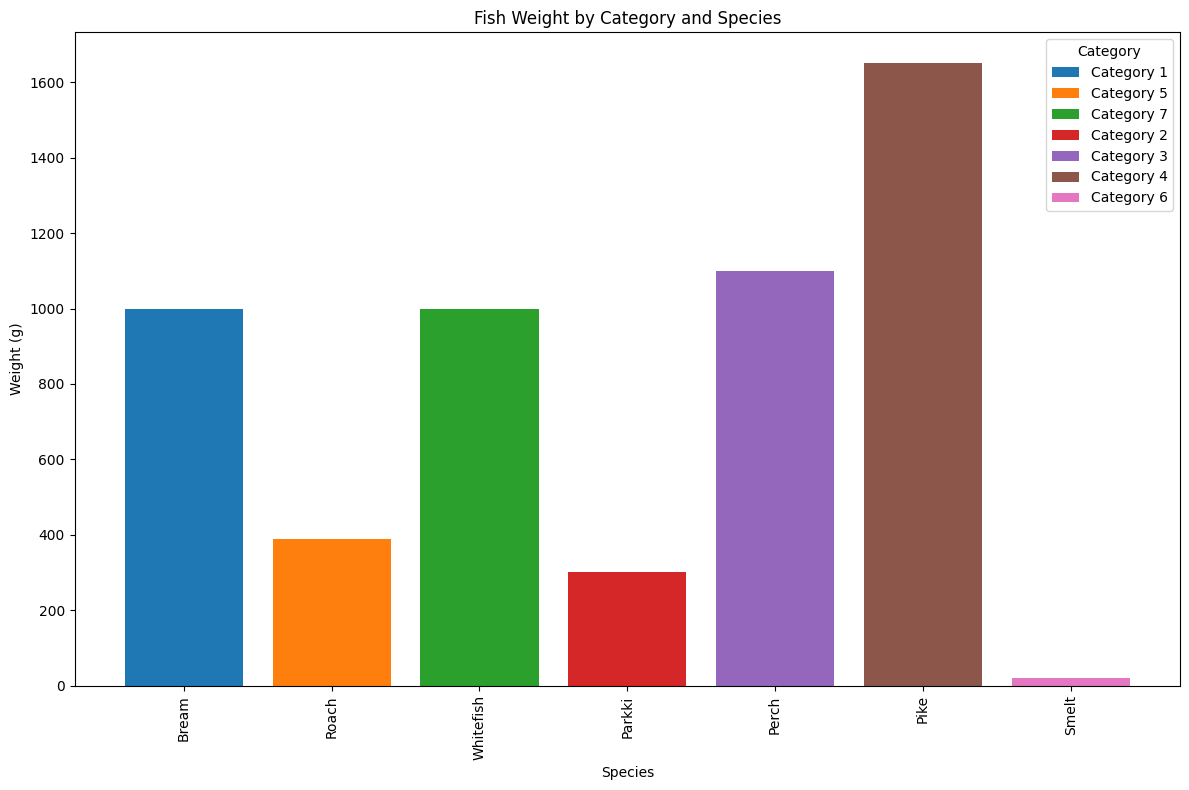

In [32]:
# Create a bar chart
plt.figure(figsize=(12, 8))
for category in fishs['Category'].unique():
    subset = fishs[fishs['Category'] == category]
    plt.bar(subset['Species'], subset['Weight'], label=f'Category {category}')

plt.xlabel('Species')
plt.ylabel('Weight (g)')
plt.title('Fish Weight by Category and Species')
plt.legend(title='Category')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('fish_weight_barchart.png')

# Display the plot
plt.show()

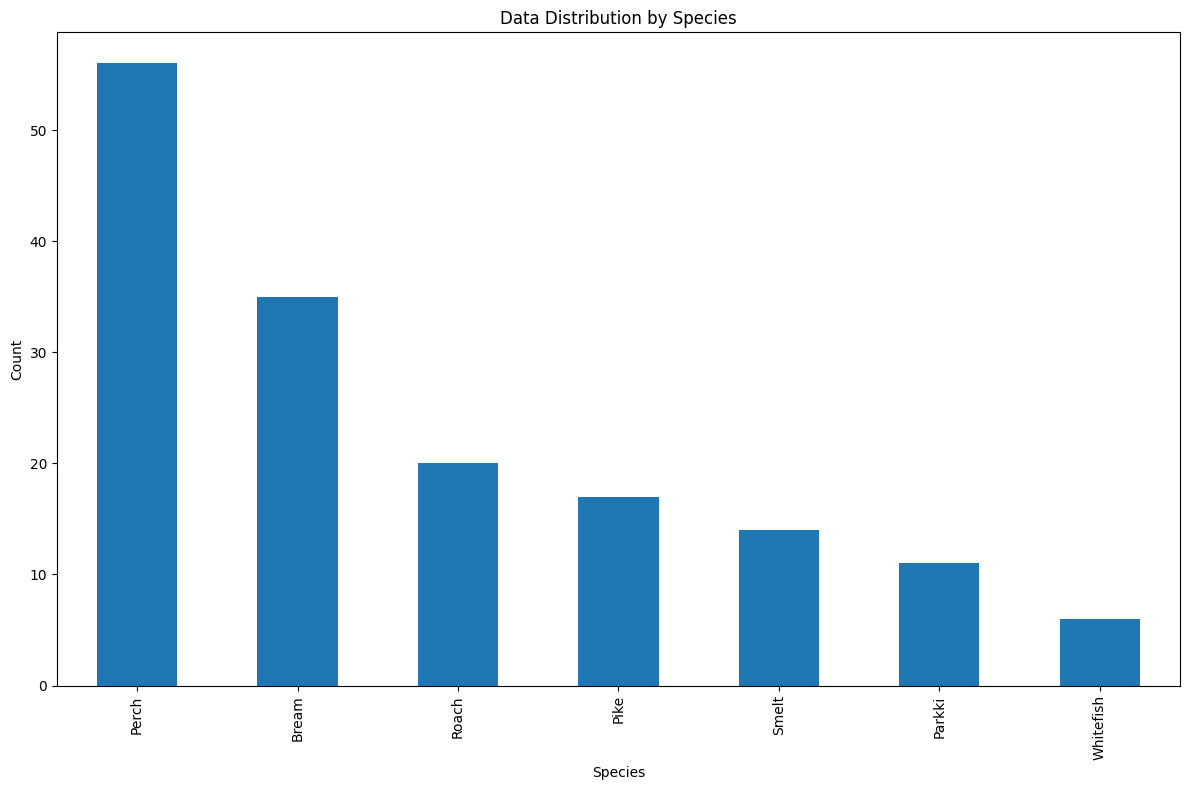

In [35]:

# Create a bar chart for data distribution by species
species_counts = fishs['Species'].value_counts()
plt.figure(figsize=(12, 8))
species_counts.plot(kind='bar')

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Data Distribution by Species')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('data_distribution_by_species.png')

# Display the plot
plt.show()